In [1]:
#Импорт библиотек и настройка
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
from IPython.display import clear_output
import torch
from torch import nn
plt.rcParams.update({'font.size': 16})
sns.set_style('whitegrid')
np.random.seed(0xFA1AFE1)

In [2]:
#device type
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [3]:
#Чтение данных
df = pd.read_csv('YearPredictionMSD.txt.zip', header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515340,2006,51.28467,45.88068,22.19582,-5.53319,-3.61835,-16.36914,2.12652,5.18160,-8.66890,...,4.81440,-3.75991,-30.92584,26.33968,-5.03390,21.86037,-142.29410,3.42901,-41.14721,-15.46052
515341,2006,49.87870,37.93125,18.65987,-3.63581,-27.75665,-18.52988,7.76108,3.56109,-2.50351,...,32.38589,-32.75535,-61.05473,56.65182,15.29965,95.88193,-10.63242,12.96552,92.11633,10.88815
515342,2006,45.12852,12.65758,-38.72018,8.80882,-29.29985,-2.28706,-18.40424,-22.28726,-4.52429,...,-18.73598,-71.15954,-123.98443,121.26989,10.89629,34.62409,-248.61020,-6.07171,53.96319,-8.09364
515343,2006,44.16614,32.38368,-3.34971,-2.49165,-19.59278,-18.67098,8.78428,4.02039,-12.01230,...,67.16763,282.77624,-4.63677,144.00125,21.62652,-29.72432,71.47198,20.32240,14.83107,39.74909


In [4]:
#describe
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
count,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,...,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000
mean,1998.397082,43.387126,1.289554,8.658347,1.164124,-6.553601,-9.521975,-2.391089,-1.793236,3.727876,...,15.755406,-73.461500,41.542422,37.934119,0.315751,17.669213,-26.315336,4.458641,20.035136,1.329105
std,10.931046,6.067558,51.580351,35.268585,16.322790,22.860785,12.857751,14.571873,7.963827,10.582861,...,32.099635,175.618889,122.228799,95.050631,16.161764,114.427905,173.977336,13.346557,185.558247,22.088576
min,1922.000000,1.749000,-337.092500,-301.005060,-154.183580,-181.953370,-81.794290,-188.214000,-72.503850,-126.479040,...,-437.722030,-4402.376440,-1810.689190,-3098.350310,-341.789120,-3168.924570,-4319.992320,-236.039260,-7458.378150,-381.424430
25%,1994.000000,39.954690,-26.059520,-11.462710,-8.487500,-20.666450,-18.440990,-10.780600,-6.468420,-2.293660,...,-1.812650,-139.555160,-20.986900,-4.669540,-6.781590,-31.580610,-101.530300,-2.566090,-59.509270,-8.820210
50%,2002.000000,44.258500,8.417850,10.476320,-0.652840,-6.007770,-11.188390,-2.046670,-1.736450,3.822310,...,9.171850,-53.090060,28.791060,33.623630,0.820840,15.598470,-21.204120,3.117640,7.759730,0.053050
75%,2006.000000,47.833890,36.124010,29.764820,8.787540,7.741870,-2.388960,6.508580,2.913450,9.961820,...,26.274480,13.478730,89.661770,77.785800,8.470990,67.794960,52.389330,9.967740,86.351610,9.679520
max,2011.000000,61.970140,384.065730,322.851430,335.771820,262.068870,166.236890,172.402680,126.741270,146.297950,...,840.973380,4469.454870,3210.701700,1734.079690,260.544900,3662.065650,2833.608950,463.419500,7393.398440,677.899630


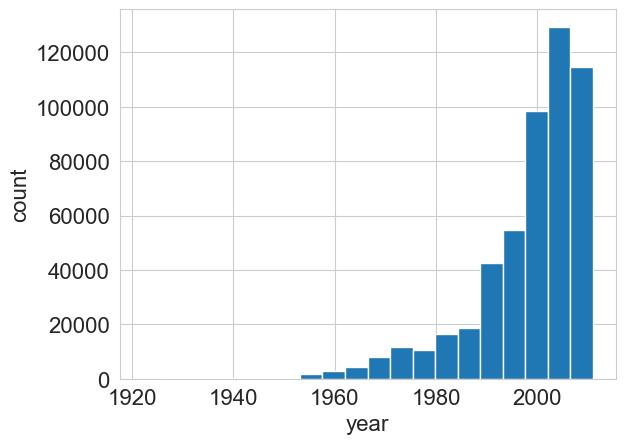

Range: 1922 - 2011
Unique values: 89


In [5]:
#year - count
plt.hist(df.iloc[:, 0], bins=20)
plt.xlabel('year')
plt.ylabel('count')
plt.show()
print(f'Range: {df.iloc[:, 0].min()} - {df.iloc[:, 0].max()}')
print(f'Unique values: {np.unique(df.iloc[:, 0]).size}')

In [6]:
#data shape
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

train_size = int(0.75 * X.shape[0])
X_train = X[:train_size, :]
y_train = y[:train_size]
X_test = X[train_size:, :]
y_test = y[train_size:]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((386508, 90), (128837, 90), (386508,), (128837,))

In [7]:
#Ridge regression and MSE metrics
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
model = Ridge()
model.fit(X_train,y_train)
print('Mean squared error on train:',mean_squared_error(y_train,model.predict(X_train)))
print('Mean squared error on test:',mean_squared_error(y_test,model.predict(X_test)))

Mean squared error on train: 91.66511494512648
Mean squared error on test: 89.74966397222084


In [8]:
#best number
best_const = np.mean(y_train)
best_const

1998.3753660985026

In [9]:
#train-test-split
X_tran, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.25,random_state=0xE2E4)
X_train.shape, X_val.shape

((386508, 90), (96627, 90))

In [10]:
#plot losses
def plot_losses(train_losses,train_metrics,val_losses,val_metrics):
    clear_output()
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    axs[0].plot(range(1, len(train_losses) + 1), train_losses, label='train')
    axs[0].plot(range(1, len(val_losses) + 1), val_losses, label='val')
    axs[1].plot(range(1, len(train_metrics) + 1), train_metrics, label='train')
    axs[1].plot(range(1, len(val_metrics) + 1), val_metrics, label='val')
    if max(train_losses) / min(train_losses) > 10:
        axs[0].set_yscale('log')

    if max(train_metrics) / min(train_metrics) > 10:
        axs[0].set_yscale('log')

    for ax in axs:
        ax.set_xlabel('epoch')
        ax.legend()

    axs[0].set_ylabel('loss')
    axs[1].set_ylabel('MSE')
    plt.show()


In [25]:
def train_and_validate(model, optimizer, criterion, metric, train_loader, val_loader,
                       num_epochs, verbose=True):
    '''
    Train and validate neural network
      - model: neural network to train
      - optimizer: optimizer chained to a model
      - criterion: loss function class
      - metric: function to measure MSE taking neural networks predictions
                 and ground truth labels
      - train_loader: DataLoader with train set
      - val_loader: DataLoader with validation set
      - num_epochs: number of epochs to train
      - verbose: whether to plot metrics during training
    Returns:
      - train_mse: training MSE over the last epoch
      - val_mse: validation MSE after the last epoch
    '''
    
    train_losses, val_losses = [], []
    train_metrics, val_metrics = [], []

    for epoch in range(1, num_epochs + 1):
        model.train()
        running_loss, running_metric = 0, 0
        pbar = tqdm(train_loader, desc=f'Training {epoch}/{num_epochs}') \
            if verbose else train_loader

        for i, (X_batch, y_batch) in enumerate(pbar, 1):
            '''
            YOUR CODE HERE (－.－)...zzzZZZzzzZZZ
            Do forward and backward passes
            predictions = ...
            loss = ...
            '''
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)

            optimizer.zero_grad()

            predictions = model(X_batch)
            loss = criterion(predictions, y_batch)
            loss.backward()

            optimizer.step()

            with torch.no_grad():
                metric_value = metric(predictions, y_batch)
                if type(metric_value) == torch.Tensor:
                    metric_value = metric_value.item()
                running_loss += loss.item() * X_batch.shape[0]
                running_metric += metric_value * X_batch.shape[0]

            if verbose and i % 100 == 0:
                pbar.set_postfix({'loss': loss.item(), 'MSE': metric_value})

        train_losses += [running_loss / len(train_loader.dataset)]
        train_metrics += [running_metric / len(train_loader.dataset)]

        model.eval()
        running_loss, running_metric = 0, 0
        pbar = tqdm(val_loader, desc=f'Validating {epoch}/{num_epochs}') \
            if verbose else val_loader

        for i, (X_batch, y_batch) in enumerate(pbar, 1):
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)
            with torch.no_grad():
                '''
                YOUR CODE HERE (－.－)...zzzZZZzzzZZZ
                Do evaluation
                predictions = ...
                loss = ...
                '''
                # X_batch = X_batch.to()
                # y_batch = y_batch.to()

                predictions = model(X_batch)
                loss = criterion(predictions, y_batch)

                metric_value = metric(predictions, y_batch)
                if type(metric_value) == torch.Tensor:
                    metric_value = metric_value.item()
                running_loss += loss.item() * X_batch.shape[0]
                running_metric += metric_value * X_batch.shape[0]

            if verbose and i % 100 == 0:
                pbar.set_postfix({'loss': loss.item(), 'MSE': metric_value})

        val_losses += [running_loss / len(val_loader.dataset)]
        val_metrics += [running_metric / len(val_loader.dataset)]

        if verbose:
            plot_losses(train_losses, train_metrics, val_losses, val_metrics)

    if verbose:
        print(f'Validation MSE: {val_metrics[-1]:.3f}')

    return train_metrics[-1], val_metrics[-1]

In [29]:
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import Dataset
class Dataset_(Dataset):
    def __init__(self, X: np.ndarray, y: np.ndarray, le: LabelEncoder):
        self.X = torch.from_numpy(X).to(torch.float32)
        self.y = (torch.from_numpy(le.transform(y)))
    def __len__(self):
        return self.X.shape[0]
    def __getitem__(self, index):
        return self.X[index], self.y[index]
class MLP(nn.Module):
    def __init__(self, in_features, num_classes, hidden_size):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(in_features=in_features, out_features=hidden_size),
            nn.ReLU(),
            nn.Linear(in_features=hidden_size, out_features=num_classes, bias=False)
        )
    def forward(self, x):
        return self.model(x)

In [27]:
#Dataloader, model, optimizer and criterion(loss)
from torch.utils.data import DataLoader
le = LabelEncoder()
le.fit(y)
BATCH_SIZE = 48
NUM_EPOCHS = 4
train_loader = DataLoader(Dataset_(X_train, y_train, le), batch_size=BATCH_SIZE)
test_loader = DataLoader(Dataset_(X_test, y_test, le), batch_size=BATCH_SIZE)
val_loader = DataLoader(Dataset_(X_val, y_val, le), batch_size=BATCH_SIZE)
DIM_START = 90
DIM_FINISH = len(np.unique(y))
model = MLP(in_features=DIM_START, num_classes=DIM_FINISH, hidden_size=128)

In [30]:
#MSE lambda and train and validate
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)
criterion = nn.CrossEntropyLoss()
metricMSE = lambda y_pred, y_true: nn.MSELoss()(torch.max(y_pred, 1).indices.to(torch.float32), y_true.to(torch.float32))
train_, val_ = train_and_validate(model, optimizer, criterion, metricMSE, train_loader, test_loader, NUM_EPOCHS)

Training 1/4:   0%|          | 0/6040 [00:00<?, ?it/s]

NotImplementedError: 

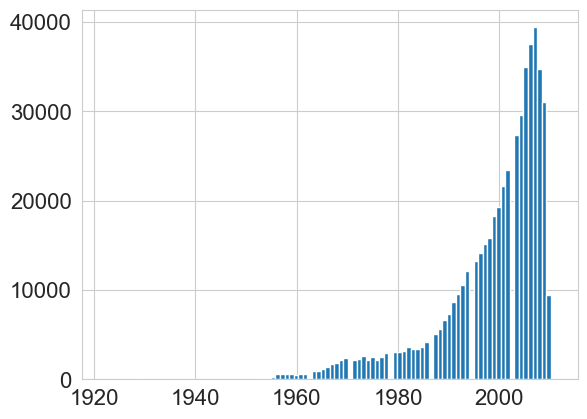

In [31]:
plt.hist(y, bins=100)
plt.show()

In [32]:
#Решение задачи как регрессии
class Dataset_(Dataset):
    def __init__(self, X: np.ndarray, y: np.ndarray):
        self.X = torch.from_numpy(X).to(torch.float32)
        y = torch.from_numpy(y).to(torch.float32)
        self.y = y.reshape(-1, 1)

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, index):
        return self.X[index], self.y[index]

class MLP(nn.Module):
    def __init__(self, in_features, num_classes, hidden_size):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(in_features=in_features, out_features=hidden_size),
            nn.ReLU(),
            nn.Linear(in_features=hidden_size, out_features=num_classes)
        )

    def forward(self, x):
        return self.model(x)

In [33]:
train_loader = DataLoader(DataSet_(X_train,y_train,le),batch_size=BATCH_SIZE)
test_loader = DataLoader(DataSet_(X_test,y_test,le),batch_size=BATCH_SIZE)
val_loader = DataLoader(DataSet_(X_val,y_val,le),batch_size=BATCH_SIZE)
model2 = MLP(in_features=DIM_START, num_classes=1, hidden_size=128)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-6)
criterion = nn.MSELoss()
metricMSE = lambda y_pred, y_true: nn.MSELoss()(y_pred, y_true)
train_, val_ = train_and_validate(model2, optimizer, criterion, metricMSE, train_loader, test_loader, NUM_EPOCHS)

Training 1/4:   0%|          | 0/6040 [00:00<?, ?it/s]

NotImplementedError: 

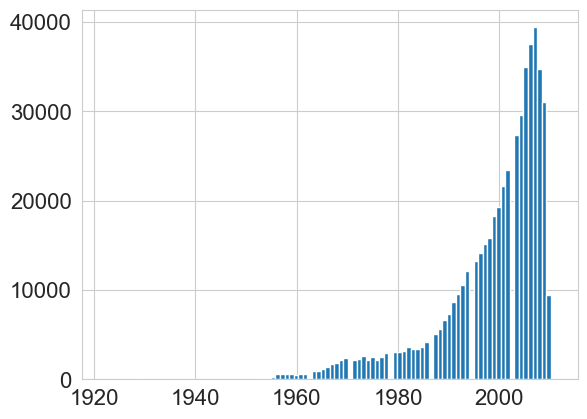

In [34]:
plt.hist(y, bins=100)
plt.show()

In [35]:
min_ = min(y_train)
max_ = max(y_train)

print(min_, max_)

1922 2011


In [36]:
#Normalized class
class DataSet_(Dataset):
    def __init__(self, X: np.ndarray, y: np.ndarray):
        self.X = torch.from_numpy(X).to(torch.float32)
        self.y = torch.from_numpy(y).to(torch.float32)
        y = y.reshape(-1,1)
        self.y = normalize(y)
    def __len__(self):
        return self.X.shape[0]
    def __getitem__(self,index):
        return self.X[index], self.y[index]
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
        nn.Flatten(),
        )
        

In [37]:
class Dataset_(Dataset):
    def __init__(self, X: np.ndarray, y: np.ndarray):
        self.X = torch.from_numpy(X).to(torch.float32)
        y = torch.from_numpy(y).to(torch.float32)
        self.y = y.reshape(-1, 1)

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, index):
        return self.X[index], self.y[index]

class MLP(nn.Module):
    def __init__(self, in_features, num_classes, hidden_size):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(in_features=in_features, out_features=hidden_size),
            nn.ReLU(),
            nn.Linear(in_features=hidden_size, out_features=num_classes)
        )

    def forward(self, x):
        return self.model(x)
train_loader = DataLoader(Dataset_(X_train, y_train), batch_size=BATCH_SIZE)
test_loader = DataLoader(Dataset_(X_test, y_test), batch_size=BATCH_SIZE)
val_loader = DataLoader(Dataset_(X_val, y_val), batch_size=BATCH_SIZE)

model = MLP(in_features=DIM_START, num_classes=1, hidden_size=128)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-6)

criterion = nn.MSELoss()

metricMSE = lambda y_pred, y_true: nn.MSELoss()(y_pred, y_true)

train_, val_ = train_and_validate(model, optimizer, criterion, metricMSE, train_loader, test_loader, NUM_EPOCHS)

Training 1/4:   0%|          | 0/6040 [00:00<?, ?it/s]

IndexError: index 289881 is out of bounds for dimension 0 with size 289881

In [51]:
def normalize(sample):
    return (sample-min_)/(max_- min_)
def denormalize(sample):
    return (sample*(max_-min_)+min_)

In [52]:
class Dataset__(Dataset):
    def __init__(self, X: np.ndarray, y: np.ndarray):
        self.X = torch.from_numpy(X).to(torch.float32)
        y = torch.from_numpy(y).to(torch.float32)
        y = y.reshape(-1, 1)
        self.y = normalize(y)

    def __len__(self):
        return self.X.shape[0]

    def  __getitem__(self, index):
        return self.X[index], self.y[index]

class MLP(nn.Module):
    def __init__(self, in_features, num_classes, hidden_size):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(in_features=in_features, out_features=hidden_size),
            nn.ReLU(),
            nn.Linear(in_features=hidden_size, out_features=num_classes),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

In [53]:
train_loader = DataLoader(DataSet_(X_train,y_train),batch_size=64)
test_loader = DataLoader(DataSet_(X_test,y_test),batch_size=64)
val_loader = DataLoader(DataSet_(X_val,y_val),batch_size=64)
model = MLP(in_features=DIM_START,num_classes=1,hidden_size=128)
optimizer = torch.optim.SGD(model.parameters(),lr=1e-6)
criterion = nn.MSELoss()
MSE = lambda y_pred,y_true: nn.MSELoss()(denormalize(y_pred),denormalize(y_true))
train_, val_ = train_and_validate(model, optimizer, criterion, MSE, train_loader, test_loader, NUM_EPOCHS)

Training 1/4:   0%|          | 0/6040 [00:00<?, ?it/s]

RuntimeError: Found dtype Double but expected Float